# Import Data
## https://github.com/uci-ml-repo/ucimlrepo

# fetch_ucirepo
Loads a dataset from the UCI ML Repository, including the dataframes and metadata information.

## Parameters
Provide either a dataset ID or name as keyword (named) arguments. Cannot accept both.
- id: Dataset ID for UCI ML Repository
- name: Dataset name, or substring of name
## Returns
- dataset
    - data: Contains dataset matrices as pandas dataframes
    - ids: Dataframe of ID columns
    - features: Dataframe of feature columns
    - targets: Dataframe of target columns
    - original: Dataframe consisting of all IDs, features, and targets
    - headers: List of all variable names/headers
- metadata: Contains metadata information about the dataset
    - See Metadata section below for details
- variables: Contains variable details presented in a tabular/dataframe format
    - name: Variable name
    - role: Whether the variable is an ID, feature, or target
    - type: Data type e.g. categorical, integer, continuous
    - demographic: Indicates whether the variable represents demographic data
    - description: Short description of variable
    - units: variable units for non-categorical data
    - missing_values: Whether there are missing values in the variable's column

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#### we dont directly use fetching from ucirepo. Using pd directly felth more efficent than find a way to turn ucirepo data to pandas df. But its should also be feasible

In [283]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [284]:
url = "https://archive.ics.uci.edu/static/public/222/data.csv"
data = pd.read_csv(url)

 1 - age (numeric)\n   
 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") \n   
 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)\n   
 4 - education (categorical: "unknown","secondary","primary","tertiary")\n   
 5 - default: has credit in default? (binary: "yes","no")\n   
 6 - balance: average yearly balance, in euros (numeric) \n   
 7 - housing: has housing loan? (binary: "yes","no")\n   
 8 - loan: has personal loan? (binary: "yes","no")\n   # related with the last contact of the current campaign:\n   
 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") \n  
 10 - day: last contact day of the month (numeric)\n  
 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")\n  
 12 - duration: last contact duration, in seconds (numeric)\n   # other attributes:\n  
 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)\n  
 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)\n  
 15 - previous: number of contacts performed before this campaign and for this client (numeric)\n  
 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")\n\n  Output variable (desired target):\n  
 17 - y - has the client subscribed a term deposit? (binary: "yes","no")\n', 'citation': None}}
           name     role         type      demographic  \
0           age  Feature      Integer              Age   
1           job  Feature  Categorical       Occupation   
2       marital  Feature  Categorical   Marital Status   
3     education  Feature  Categorical  Education Level   
4       default  Feature       Binary             None   
5       balance  Feature      Integer             None   
6       housing  Feature       Binary             None   
7          loan  Feature       Binary             None   
8       contact  Feature  Categorical             None   
9   day_of_week  Feature         Date             None   
10        month  Feature         Date             None   
11     duration  Feature      Integer             None   
12     campaign  Feature      Integer             None   
13        pdays  Feature      Integer             None   
14     previous  Feature      Integer             None   
15     poutcome  Feature  Categorical             None   
16            y   Target       Binary             None   

In [285]:
data.head(45211)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [286]:
data.shape

(45211, 17)

### In my code there is no Exploratory Data Analysis

I rather check each features for Feature Engineering without really analying data. But Incase There is EDA this part will show.

I need to check each columns variance etc. (Exploratory  Data Analysis) to see whether  ı should normalize data by looking their visualization than using onehotencoder check whether ı should use that column.

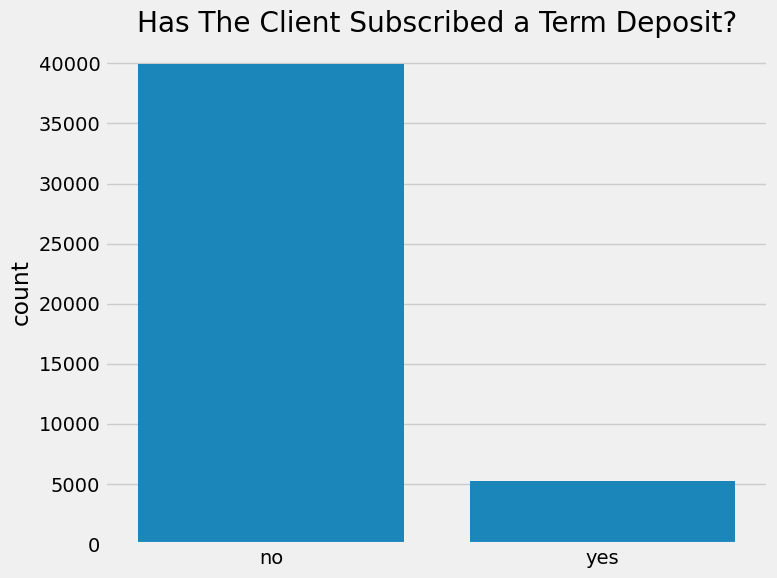

In [287]:
# plot the target variable and check just how imbalance the target variable is
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))

sns.countplot(data = data, x = 'y')

plt.xlabel('')
plt.title('Has The Client Subscribed a Term Deposit?')
plt.tight_layout()
plt.show()

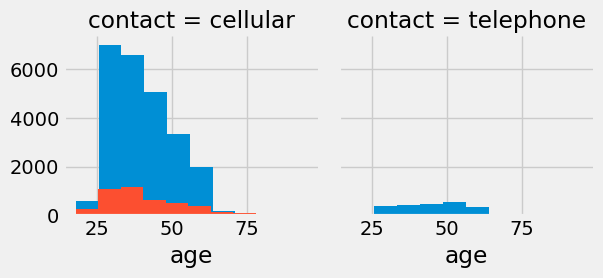

In [288]:
grid_layout = sns.FacetGrid(data, col = 'contact', hue='y', col_wrap = 3)
grid_layout.map(plt.hist, 'age')
plt.show()

So even though there is no info about how to contact they can still be contacted and even succesfully get loan

In [289]:
count = data[(data['contact'].isnull()) & (data['y'] == "yes")].shape[0]
count1 = data[(data['poutcome'].isnull()) & (data['y'] == "yes")].shape[0]
count2 = data[(data['poutcome']=="failure") & (data['y'] == "yes")].shape[0]
count3 = data[(data['poutcome']=="other") & (data['y'] == "yes")].shape[0]

count4 = data[(data['poutcome']=="success") & (data['y'] == "yes")].shape[0]


print(count,count1,count2,count3,count4)

530 3386 618 307 978


### End of The EDA

In [290]:
# Lets check how many of our features are numeric and how many of is object
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


We have 7 numeric and 9 object type data columns. Since y column is target that needed to predicted . We have only 8 object type features. /n

In [291]:
#We get all numeric features as a list
numeric_features = data.select_dtypes(include = 'number').columns.tolist()
print(numeric_features)

#We get all categorical features as a list
categorical_features = data.select_dtypes(include = 'object').columns.tolist()
categorical_features.remove("y")
print(categorical_features)

#So we can see that only categorical features has nulls
null_columns = data.columns[data.isnull().any()].tolist()
print(null_columns)

['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
['job', 'education', 'contact', 'poutcome']


In [292]:
# Lets see how many data is null per columns
"""(I just waned to name the column but seeing steps ,no need)
missing_counts= data.isna().sum() # data.isnull().sum()
result_df = pd.DataFrame(missing_counts, columns=['Sum of all NA'])
print((result_df))
"""
data.isna().sum() # data.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

In [293]:
#unique_values =data[["job","education","contact","poutcome"]].apply(lambda x: x.unique())
unique_values_job =data["job"].unique()
unique_values_education =data["education"].unique()
unique_values_contact =data["contact"].unique()
unique_values_poutcome =data["poutcome"].unique()
unique_values_marital =data["marital"].unique()
unique_values_house=data["housing"].unique()
unique_values_loam=data["loan"].unique()
unique_values_month=data["month"].unique()
unique_values_default=data["default"].unique()

print(f"Unique values in job:\n {unique_values_job}\n"
      f"Unique values in education:\n {unique_values_education}\n"
      f"Unique values in contact:\n {unique_values_contact}\n"
      f"Unique values in poutcome:\n {unique_values_poutcome}\n"
      f"Unique values in marital:\n {unique_values_marital}\n"
      f"Unique values in housing:\n {unique_values_house}\n"
      f"Unique values in loan:\n {unique_values_loam}\n"
      f"Unique values in month:\n {unique_values_month}\n"
      f"Unique values in default:\n {unique_values_default}")

Unique values in job:
 ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
Unique values in education:
 ['tertiary' 'secondary' nan 'primary']
Unique values in contact:
 [nan 'cellular' 'telephone']
Unique values in poutcome:
 [nan 'failure' 'other' 'success']
Unique values in marital:
 ['married' 'single' 'divorced']
Unique values in housing:
 ['yes' 'no']
Unique values in loan:
 ['no' 'yes']
Unique values in month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in default:
 ['no' 'yes']


In [294]:
# The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.
"""# Fill 'job' and 'education' with mode (most frequent)
data['job'].fillna(data['job'].mode()[0], inplace=True)
data['education'].fillna(data['education'].mode()[0], inplace=True)

# Fill 'contact' and 'poutcome' with 'Unknown'
data['contact'].fillna('Unknown', inplace=True)
data['poutcome'].fillna('Unknown', inplace=True)

"""
# Possible Alternative is replacing inplace=True with reassignment but I rather use encoding to get rid of these  
"""data['job'] = data['job'].fillna(data['job'].mode()[0])
data['education'] = data['education'].fillna(data['education'].mode()[0])"""
data['job'] = data['job'].fillna('Unknown')
data['education'] = data['education'].fillna('Unknown')
data['contact'] = data['contact'].fillna('Unknown')
data['poutcome'] = data['poutcome'].fillna('Unknown')

# Check if there are still missing values
data.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

https://stackoverflow.com/questions/66879886/sklearn-is-it-possible-to-specify-null-or-nan-values-for-unknown-categories-in

So here ı am mapping all unique objects to one number. So we could use either One Hot Encode or Ordinary Encode. I still not decided which would be best for which cases

In [295]:
education_mapping = {'Unknown': 0,'primary': 1, 'secondary': 2, 'tertiary': 3}
""" In case I use Ordinal Encoding for those one 
contact_mapping = {'Unknown': 0, 'cellular': 1, 'telephone': 2}
poutcome_mapping = {'Unknown': 0, 'failure': 1, 'other': 2, 'success': 3}
job_mapping = {'Unknown': 0, 'management': 1, 'technician': 2, 'entrepreneur': 3, 'blue-collar': 4,
               'retired': 5, 'admin.': 6, 'services': 7, 'self-employed': 8, 'unemployed': 9,
               'housemaid': 10, 'student': 11}
"""

# Ordinal Encoding
data['education'] = data['education'].map(education_mapping)
#data['poutcome'] = data['poutcome'].map(poutcome_mapping)  # incase its ordinal

#month can be ordinal too.
categorical_columns = ['contact', 'job', 'poutcome', 'marital', 'housing', 'loan',  'default'] # instead of one hot encode ı use cyclic encoding for month  "    'month',   "

month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
data['month'] = data['month'].map(month_mapping)


data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)
data.drop('month', axis=1, inplace=True)


# One-Hot Encoding
data = pd.get_dummies(data, columns=categorical_columns, prefix=categorical_columns, drop_first=True)


In [296]:
data.head(45211)

,age,education,balance,day_of_week,duration,campaign,pdays,previous,y,month_sin,...,job_technician,job_unemployed,poutcome_failure,poutcome_other,poutcome_success,marital_married,marital_single,housing_yes,loan_yes,default_yes
0,58,3,2143,5,261,1,-1,0,no,0.5,...,False,False,False,False,False,True,False,True,False,False
1,44,2,29,5,151,1,-1,0,no,0.5,...,True,False,False,False,False,False,True,True,False,False
2,33,2,2,5,76,1,-1,0,no,0.5,...,False,False,False,False,False,True,False,True,True,False
3,47,0,1506,5,92,1,-1,0,no,0.5,...,False,False,False,False,False,True,False,True,False,False
4,33,0,1,5,198,1,-1,0,no,0.5,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,825,17,977,3,-1,0,yes,-0.5,...,True,False,False,False,False,True,False,False,False,False
45207,71,1,1729,17,456,2,-1,0,yes,-0.5,...,False,False,False,False,False,False,False,False,False,False
45208,72,2,5715,17,1127,5,184,3,yes,-0.5,...,False,False,False,False,True,True,False,False,False,False
45209,57,2,668,17,508,4,-1,0,no,-0.5,...,False,False,False,False,False,True,False,False,False,False
